# Convolutional Neural Network

Que1: What is CNN? How does it work behind the scenes?

Que2: What are Stride, Padding, Kernel Filters, and Pooling?

Que3: Why does Overfitting happen in CNN, and how can you avoid it?

Que4: Why is InceptionNet better than VGG?

Que5: What is Augmentation?

Que6: Can you explain the concept of feature maps in CNNs?

# Machine Learning Techniques

### Problem statement and Objective

#### Black Friday Project

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.






### Data Variable Definition
• User_ID User ID


• Product_ID Product ID


• Gender Sex of User


• Age Age in bins


• Occupation Occupation (Masked)


• City_Category Category of the City (A,B,C)


• Stay_In_Current_City_Years Number of years stay in current city


• Marital_Status Marital Status


• Product_Category_1 Product Category (Masked)


• Product_Category_2 Product may belongs to other category also (Masked)


• Product_Category_3 Product may belongs to other category also (Masked)


• Purchase Purchase Amount (Target Variable)



### Goal

Our goal is to predict the purchase amount of customers for various products after completing all the necessary preprocessing steps. Additionally, hyperparameter tuning and cross validation is essential. We also need to apply feature selection techniques such as SelectKBest, VIF, and PCA.

#Dataset Link


https://raw.githubusercontent.com/s4sauravv/Datasets/main/Black%20Friday.csv


You have to use multiple algorithms to build the model, and whichever algorithm performs the best, you have to do hyperparameter tuning for it. After tuning the hyperparameters, you also need to plot its best fit line.

In [1]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/s4sauravv/Datasets/main/Black%20Friday.csv"
df = pd.read_csv(data_url)

df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [2]:
df.fillna(-999, inplace=True)

df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['Age'] = df['Age'].map({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6})
df['City_Category'] = df['City_Category'].map({'A': 0, 'B': 1, 'C': 2})
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})

X = df.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1)
y = df['Purchase']


In [3]:
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import numpy as np

# SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Principal Component Analysis (PCA)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

results


{'Linear Regression': 22385744.339023173,
 'Decision Tree': 9748164.352190692,
 'Random Forest': 9298489.029049745,
 'Gradient Boosting': 12633597.49708295}

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred)

best_mse


Fitting 3 folds for each of 8 candidates, totalling 24 fits


9603575.675682992

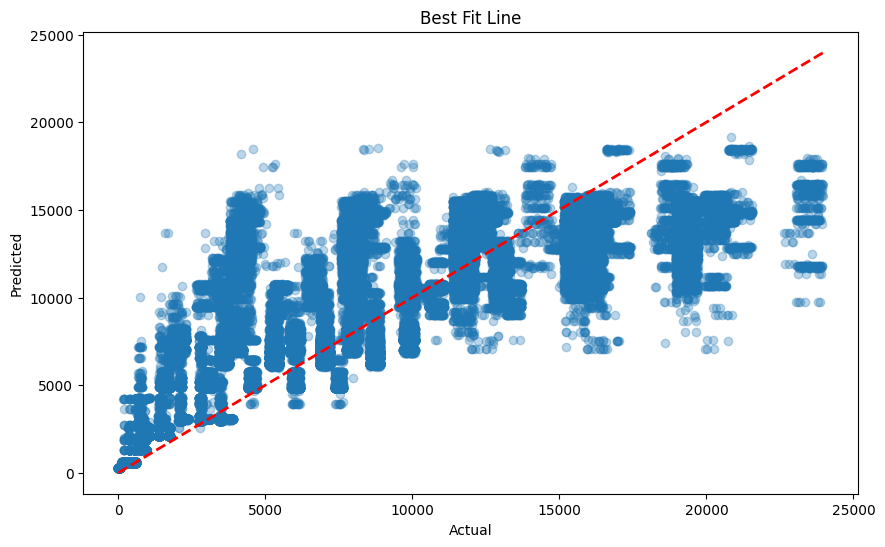

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best Fit Line')
plt.show()
